In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

# Preprocessing

In [ ]:
data = pd.read_csv('https://bitbucket.org/silverxlibra/music-mental-health/downloads/mxmh_survey_results.csv')

In [ ]:
data.shape

(736, 33)

In [ ]:
data.head(15)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [ ]:
data["Music effects"].unique() #labels

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum() #what has missing values, to decide what to do with

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
data.info

<bound method DataFrame.info of                Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Explor

In [ ]:
data.Permissions.unique() #can be dropped, everyone agreed

array(['I understand.'], dtype=object)

Potential questions to find answers to:

* what genre resulted in the most often self-reported mental health improvement? What had a worsening effect, and what had none? (maybe do this in a high level format i.e. a graph / correlation and then perhaps do run a cluster analysis via genre?)

* how do listeners access music, which platforms are most and least used, the breakdown

* what genres are favored across different age groups (e.g 18-35, 35-50, 50+)? Is there a difference between music influence on mental health? There is likely a generational difference between what genres different demographics are preferring and the reported outcomes on their respective mental health?

* what clusters of listeners can be detected? What features are the most telling in clumping them together?

* moar to follow

* Is there a correlation b/w hours listened and mental wellbeing

* do individuals that listen to music while working report more improved mental health than those who don't listen while they work?


# Exploratory Data Analysis and visualizations

###How do listeners access music, what platforms do they use?

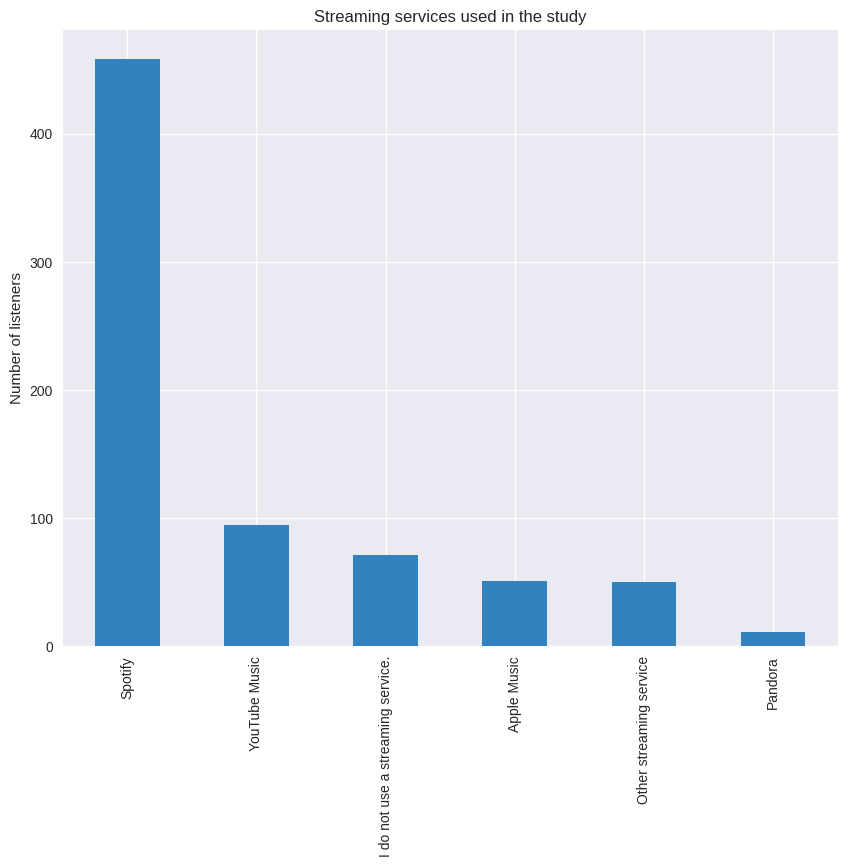

In [ ]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-v0_8')
plt.title('Streaming services used in the study')
plt.ylabel('Number of listeners')

data['Primary streaming service'].value_counts().plot.bar(cmap = 'tab20c')
plt.show()

How much do the participants listen to music while working vs in their spare time?

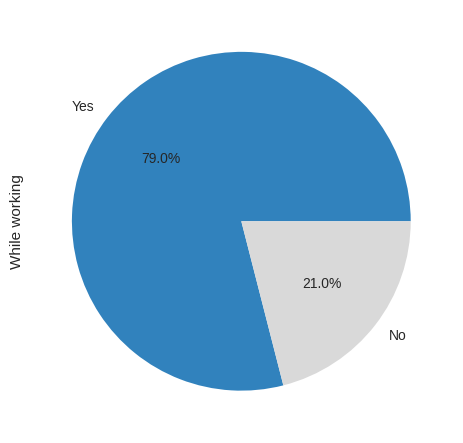

In [ ]:
data['While working'].value_counts().plot.pie(autopct='%1.1f%%',
                                              cmap = 'tab20c'
                                              )
plt.show()

The overwhelming majority of the participants listen to music on Spotify, by far the most popular streaming service in this study, with a few others in the mix. Almost 80% of the participants report listening while working.

### What ages are represented?


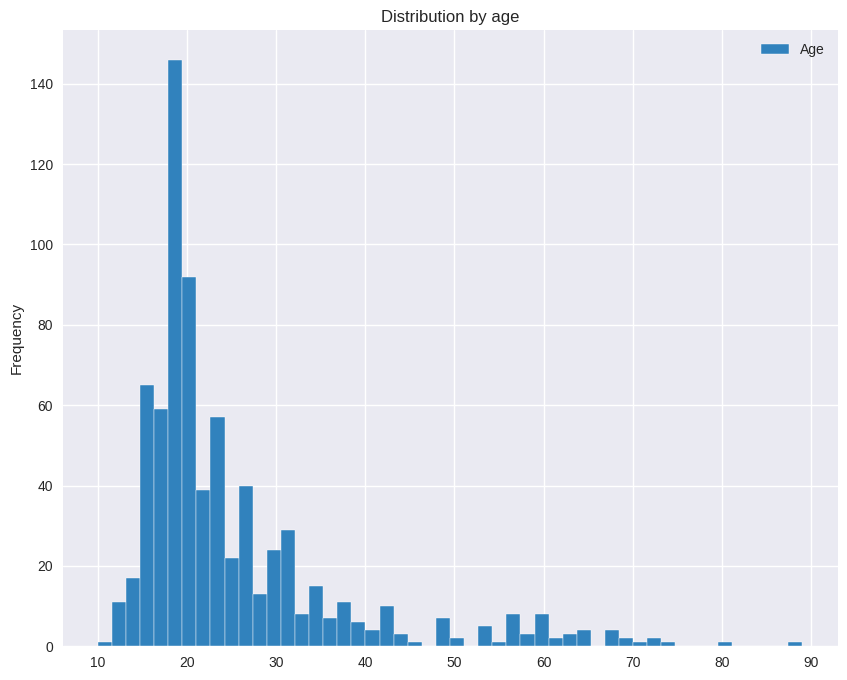

In [ ]:
data.Age.plot.hist(figsize = (10, 8),
                   bins = 50,
                   cmap = 'tab20c',
                   edgecolor = 'white',
                   ylabel = 'Counts',
                   xlabel = 'Ages',
                   title = 'Distribution by age',
                   legend = 'upper right')

plt.show()

In [ ]:
data.Age.mean()

25.206802721088437

In [ ]:
data.Age.mode()

0    18.0
Name: Age, dtype: float64

In [ ]:
data.Age.median()

21.0

The data is right-skewed towards the younger demographic; by far the largest group is 18 to 25, but all age groups are represented.

# Music access preference by age

Does the way the respondents in this study prefer to listen to music vary with age? How do participants in different age groups prefer to access music?


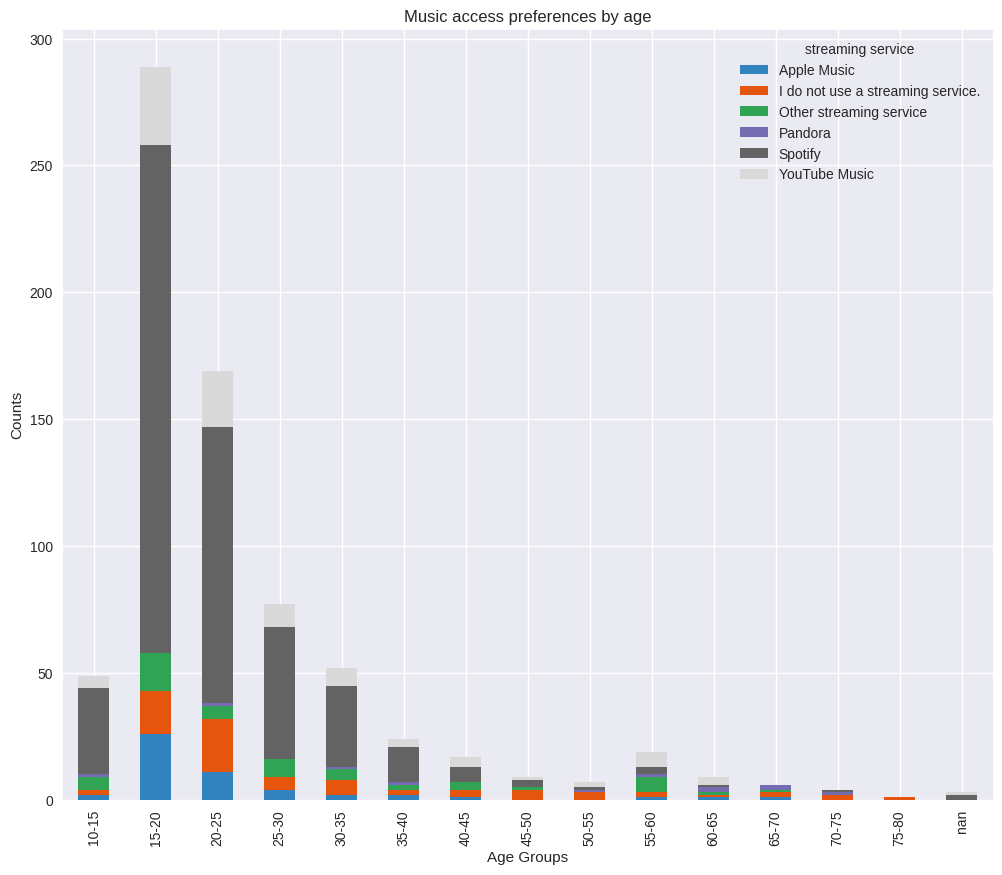

In [ ]:
streaming_service = data['Primary streaming service']

bin_edges = range(10, 90, 5)
age_bins = pd.cut(data['Age'], bins = bin_edges).astype(str)
#cosmetic changes to set xticks:
age_bins = age_bins.str.replace(', ', '-', regex = True).str.replace('(', '', regex = True).str.replace(']', '', regex = True)


df = pd.DataFrame({'streaming service': streaming_service,
                   'ages': age_bins})

pivoted_df = pd.pivot_table(df, index = age_bins,
                            columns = 'streaming service',
                            aggfunc = 'size')
pivoted_df.plot.bar(figsize = (12, 10),
                    cmap = 'tab20c', #not necessarily this color map but the default is not visually appealing
                    stacked = True,
                    title = 'Music access preferences by age',
                    xlabel = 'Age Groups',
                    ylabel = 'Counts',
                    legend = 'upper right')


plt.show()

### What genres do the participants prefer?

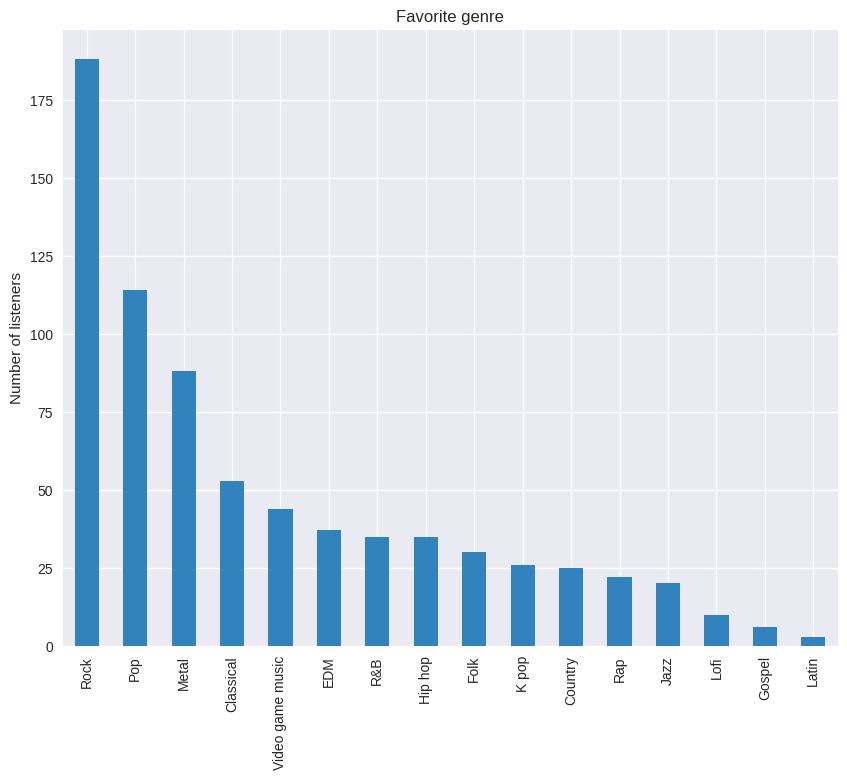

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Favorite genre')

plt.ylabel('Number of listeners')
data['Fav genre'].value_counts().plot.bar(cmap = 'tab20c')
plt.show()

What is the overall picture with genre preference by age?

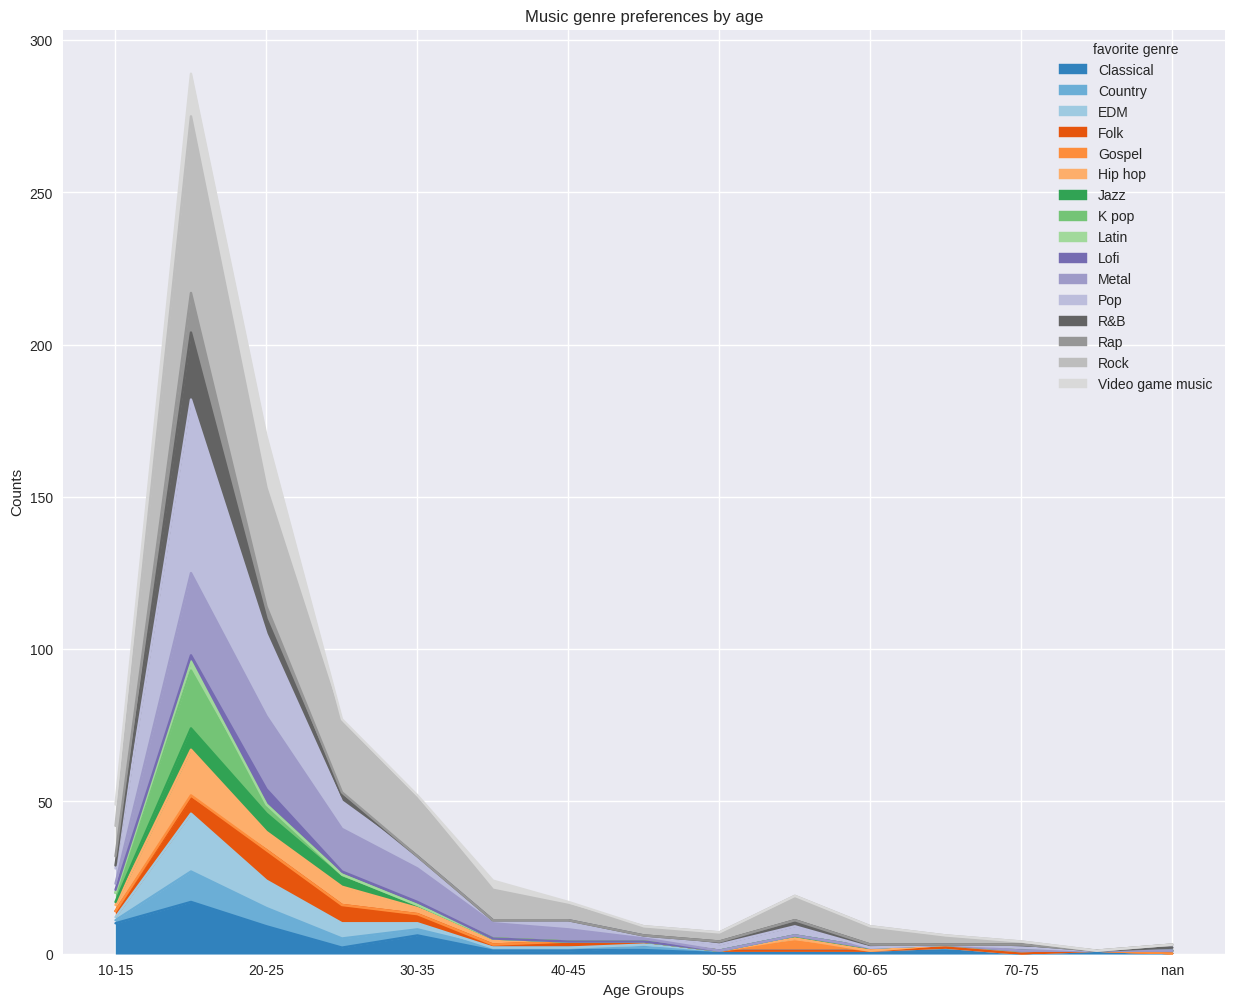

In [ ]:
df1 = pd.DataFrame({'favorite genre': data['Fav genre'],
                   'ages': age_bins})

pivoted_df1 = pd.pivot_table(df1, index = age_bins,
                            columns = 'favorite genre',
                            aggfunc = 'size')#.sort_index(ascending=False)

#alternatively plot.barh() is also an option

pivoted_df1.plot.area(figsize = (15, 12),
                    cmap = 'tab20c', #not necessarily this color map but the default is not visually appealing
                    stacked = True,
                    title = 'Music genre preferences by age',
                    xlabel = 'Age Groups',
                    ylabel = 'Counts',
                    legend = 'lower right')


plt.show()

What is the distribution by the number of hours that the participants report listening to music for?

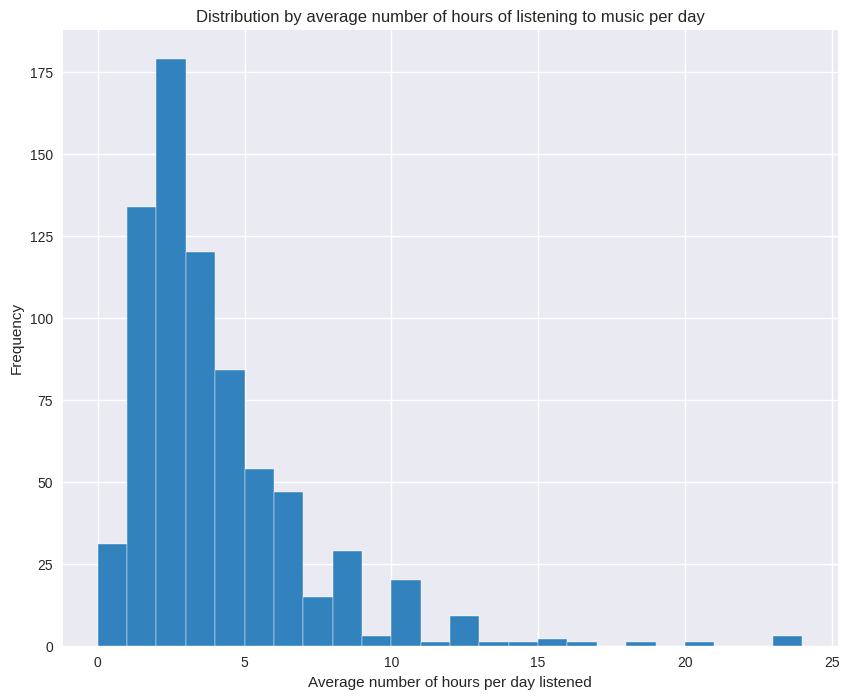

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlabel('Average number of hours per day listened')
plt.ylabel('Number of listeners')
plt.title('Distribution by average number of hours of listening to music per day')

data['Hours per day'].plot.hist(bins = 24,
                                cmap = 'tab20c',
                                edgecolor = 'white')

plt.show()

The majority of the participants listen to music while they work; rock is the most popular genre, followed by pop, metal and classical. Most listeners report listening to music about 3 hours daily.

## Mental Health Conditions

When it comes to the mental health conditions this study is concerned with, ate there observable trends? Do any of these conditions co-occur, is there any correlation? For example, do any of the four mental health conditions - anxiety, depression, insomnia and OCD - go together more often that other combinations?

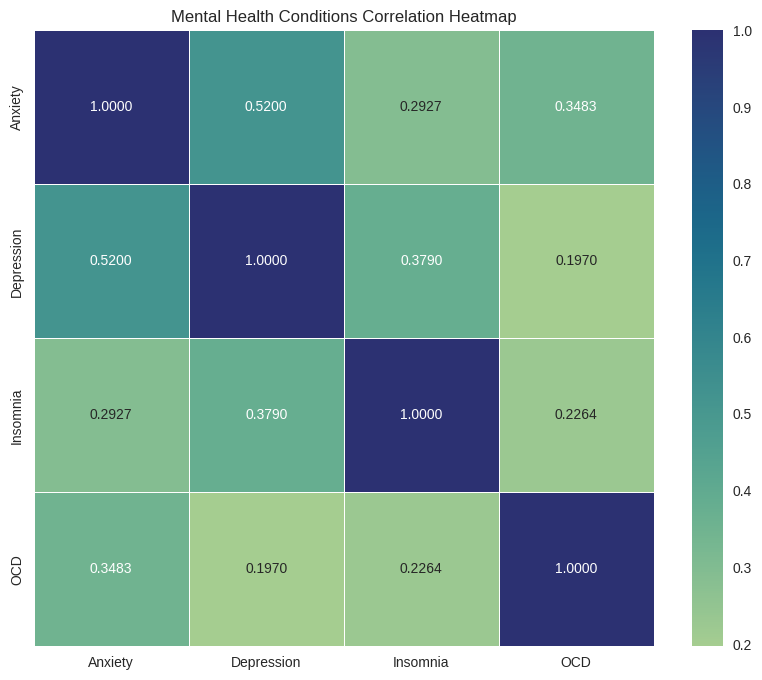

In [ ]:
mh_data = data[['Anxiety', 'Depression', 'Insomnia', 'OCD']]

import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Mental Health Conditions Correlation Heatmap')
sns.heatmap(mh_data.corr(), cmap = 'crest', annot=True, fmt=".4f",  linewidths=0.5)
plt.show()

It appears that the most common and prominent co-occurring pair is *anxiety and depression*.
It is followed by *insomnia and depression* as the second highest correlated pair; the third is *anxiety and OCD*, although the correlation is not as clear and significant in these cases.

What is the spread of the severity of the conditions? They are rated on the scale from 0 to 10. Let's compare them side by side:

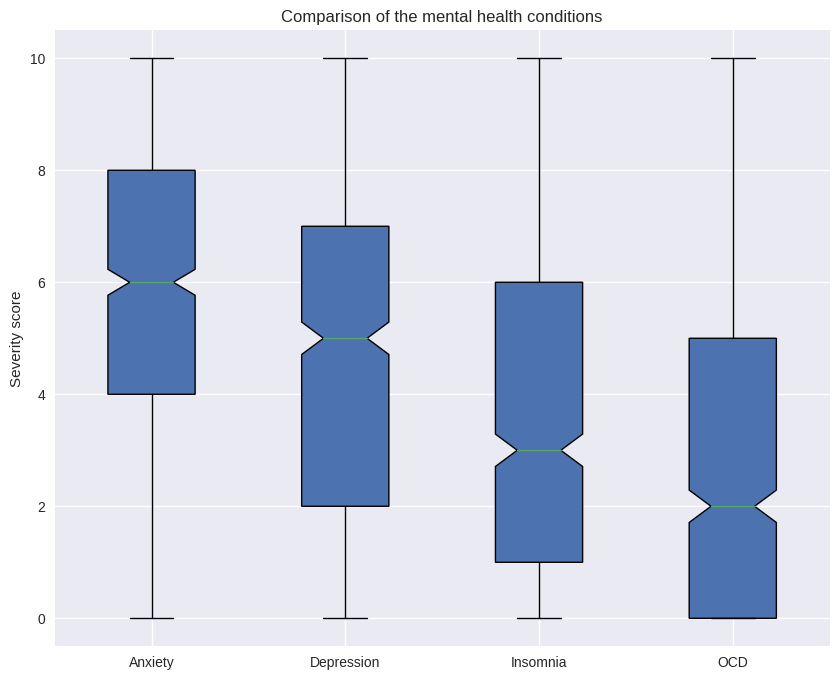

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.boxplot(mh_data, patch_artist = True,
           notch = True,
           labels = mh_data.columns,
           showfliers = True,
           )

ax.set(
    title='Comparison of the mental health conditions',
    #xticklabels = mh_data.columns,
    ylabel='Severity score',
)
plt.show()

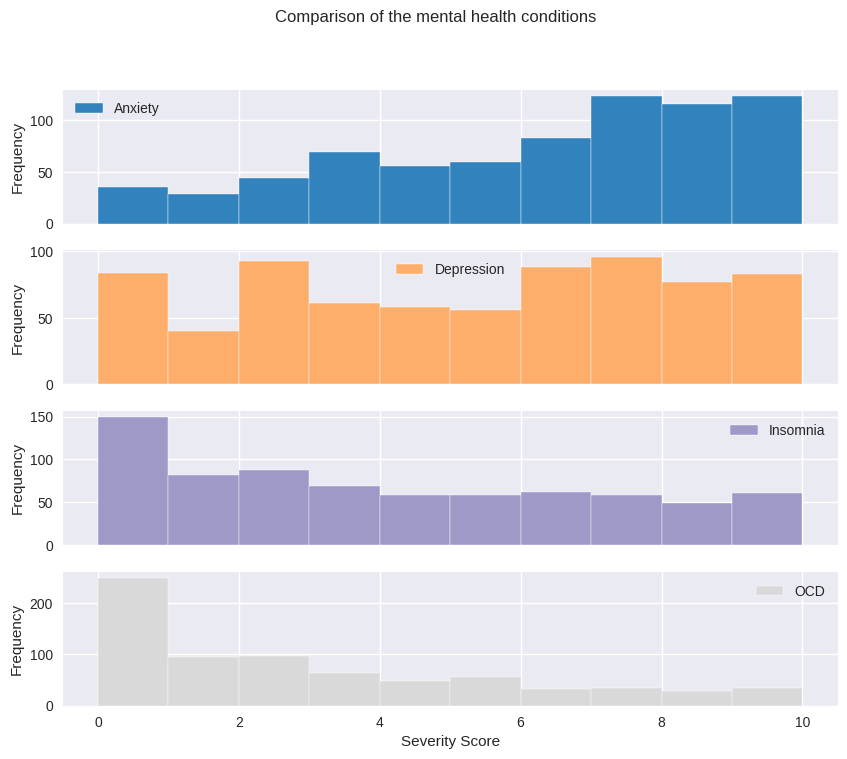

In [ ]:
mh_data.plot.hist(cmap = 'tab20c',
                  edgecolor = 'white',
                  figsize = (10, 8),
                  subplots = True, #comment out to compare with the previous version
                  title = 'Comparison of the mental health conditions ')

plt.xlabel('Severity Score')
#plt.ylabel('Counts')

plt.show()


## Clustering potential

Let's take a look at one single entry:

In [ ]:
data.iloc[0]

Timestamp                       8/27/2022 19:29:02
Age                                           18.0
Primary streaming service                  Spotify
Hours per day                                  3.0
While working                                  Yes
Instrumentalist                                Yes
Composer                                       Yes
Fav genre                                    Latin
Exploratory                                    Yes
Foreign languages                              Yes
BPM                                          156.0
Frequency [Classical]                       Rarely
Frequency [Country]                          Never
Frequency [EDM]                             Rarely
Frequency [Folk]                             Never
Frequency [Gospel]                           Never
Frequency [Hip hop]                      Sometimes
Frequency [Jazz]                             Never
Frequency [K pop]                  Very frequently
Frequency [Latin]              

This could be used to form clusters:

e.g. someone who reports Latin music as their favorite genre also reports listening to K-pop, pop and rap very frequently while never listening to country, gospel, jazz or metal.

Mental health-wise, this participant seems to suffer from mild anxiety and minimal insomnia; and not at all from depression or OCD.

Can we find similar participants and group them to see any distinct patterns?

## Data Cleaning

Drop NULL or replace?
*   Looks like dropping nulls will suffice. Compared to the amount of data entries, dropping shouldn't be a concern here [except BPM]

Dropping columns?

*   BPM is not a column we are intending to use, so we can drop. (it also has the most nulls)
* Perhaps drop Timestamp as well? Not sure how necessary it is for us.



In [ ]:
#See nulls across the dataset
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
#Drop nulls
clean_data = data.dropna()

In [ ]:
len(clean_data)

616

In [ ]:
#verify nulls are gone
clean_data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [ ]:
#drop unneccsary columns
clean_data = clean_data.drop(columns=['Timestamp', 'Composer','BPM','Permissions'])

In [ ]:
#verify columns are dropped
clean_data.head(2)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,Video game music,No,Yes,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve


In [ ]:
# Encode our categorical variables into numeric values

encoded_data = pd.DataFrame()

encoder = preprocessing.LabelEncoder()

for column in clean_data.select_dtypes(include='object'):
    encoded_data[column] = encoder.fit_transform(clean_data[column])

encoded_data.head()


,Primary streaming service,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,4,0,0,15,0,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,5,1,0,6,1,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,4,1,0,12,1,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,4,1,1,6,1,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,5,1,1,15,1,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0


In [ ]:
encoded_data.max()

Primary streaming service        5
While working                    1
Instrumentalist                  1
Fav genre                       15
Exploratory                      1
Foreign languages                1
Frequency [Classical]            3
Frequency [Country]              3
Frequency [EDM]                  3
Frequency [Folk]                 3
Frequency [Gospel]               3
Frequency [Hip hop]              3
Frequency [Jazz]                 3
Frequency [K pop]                3
Frequency [Latin]                3
Frequency [Lofi]                 3
Frequency [Metal]                3
Frequency [Pop]                  3
Frequency [R&B]                  3
Frequency [Rap]                  3
Frequency [Rock]                 3
Frequency [Video game music]     3
Music effects                    2
dtype: int64

In [ ]:
clean_data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,Video game music,No,Yes,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,R&B,Yes,No,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Jazz,Yes,Yes,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,Video game music,Yes,Yes,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [ ]:
clean_data['Frequency [Pop]'].unique()

array(['Rarely', 'Sometimes', 'Very frequently', 'Never'], dtype=object)

In [ ]:
encoded_data['Frequency [Pop]'].unique()

array([1, 2, 3, 0])

In [ ]:
print(f'Validate both datasets are consistent post encoder. \nClean dataset: {len(clean_data)} \nEncoded Dataset: {len(encoded_data)}')

Validate both datasets are consistent post encoder. 
Clean dataset: 616 
Encoded Dataset: 616


In [ ]:
#looks at max value of each column (i.e. 0-15) to make sure all categorical variables have been accounted for to their numerical counterpart
encoded_data.min(axis=0)

Primary streaming service       0
While working                   0
Instrumentalist                 0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Music effects                   0
dtype: int64

In [ ]:
#one hot encoding for music genre columns
data = pd.get_dummies(data, columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
                                       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
                                       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
                                       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                                       'Frequency [R&B]', 'Frequency [Rock]', 'Frequency [Video game music]'])

Docs For Recomender System Reference:
* YT Video: https://www.youtube.com/watch?v=G4MBc40rQ2k
* Geeksforgeeks(high level w/ implementation): https://www.geeksforgeeks.org/recommendation-system-in-python/
* Movie rec system: https://thecleverprogrammer.com/2020/05/20/data-science-project-movie-recommendation-system/
* high lvl implementation: https://365datascience.com/tutorials/how-to-build-recommendation-system-in-python/


# Categorical Recommender Systems

*The following recommender systems use the categories age and anxiety, depression, insomnia, ocd, to predict the favorite genre using a random forest classifier.*

## Age-Based Recommender System

In [ ]:
#create new age df
X_age = data[['Age']]
y_age = data['Fav genre']

#train/test splits
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size = 0.2, random_state = 42)

#train model
age_mod = RandomForestClassifier(n_estimators = 100, random_state = 42)
age_mod.fit(X_train_age, y_train_age)

#eval model
y_pred_age = age_mod.predict(X_test_age)
acc_age = accuracy_score(y_test_age, y_pred_age)
print(f'Age-Based Recommender Accuracy: {acc_age}')

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Mental Health-Based Recommender System

In [ ]:
#create masks for severe mental health
high_anxiety = data['Anxiety'] >= 7.0
high_depression = data['Depression'] >= 7.0
high_insomnia = data['Insomnia'] >= 7.0
high_ocd= data['OCD'] >= 7.0

#create new mental health df
X_anxiety = data[['Anxiety']]
X_depression = data[['Depression']]
X_insomnia = data[['Insomnia']]
X_ocd = data[['OCD']]
y_diagnosis = data['Fave genre']

#train/test splits
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_anxiety[high_anxiety], y_diagnosis[high_anxiety], test_size = 0.2, random_state = 42)
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_depression[high_depression], y_diagnosis[high_depression], test_size = 0.2, random_state = 42)
X_train_insomnia, X_test_insomnia, y_train_insomnia, y_test_insomnia = train_test_split(X_insomnia[high_insomnia], y_diagnosis[high_insomnia], test_size = 0.2, random_state = 42)
X_train_ocd, X_test_ocd, y_train_ocd, y_test_ocd = train_test_split(X_ocd[high_ocd], y_diagnosis[high_ocd], test_size = 0.2, random_state = 42)

#train models
anxiety_mod = RandomForestClassifier(n_estimators = 100, random_state = 42)
anxiety_mod.fit(X_train_anxiety, y_train_anxiety)
depression_mod = RandomForestClassifier(n_estimators = 100, random_state = 42)
depression_mod.fit(X_train_depression, y_train_depression)
insomnia_mod = RandomForestClassifier(n_estimators = 100, random_state = 42)
insomnia_mod.fit(X_train_insomnia, y_train_insomnia)
ocd_mod = RandomForestClassifier(n_estimators = 100, random_state = 42)
ocd_mod.fit(X_train_ocd, y_train_ocd)

#eval models
y_pred_anxiety = anxiety_mod.predict(X_test_anxiety)
acc_anxiety = accuracy_score(y_test_anxiety, y_pred_anxiety)
print(f'Model Accuracy for High Anxiety: {acc_anxiety}')
y_pred_depression = depression_mod.predict(X_test_depression)
acc_depression = accuracy_score(y_test_depression, y_pred_depression)
print(f'Model Accuracy for High Depression: {acc_depression}')
y_pred_insomnia = insomnia_mod.predict(X_test_insomnia)
acc_insomnia = accuracy_score(y_test_insomnia, y_pred_insomnia)
print(f'Model Accuracy for High Insomnia: {acc_insomnia}')
y_pred_ocd = ocd_mod.predict(X_test_ocd)
acc_ocd = accuracy_score(y_test_ocd, y_pred_ocd)
print(f'Model Accuracy for High Anxiety: {acc_ocd}')

# Multi-Class Classifier

*The following recommender system combines the previous two. It uses the predictions from each models as features for a new model that predicts the favorite genre. This new model considers both the age and the mental health conditions.*

In [ ]:
encoded_data.unique()

array([1, 0, 2])

In [ ]:
clean_data["Music effects"].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

1. Use SelectKBest with the ANOVA F-value scoring function to select the top K features that are most relevant to predicting the target variable.
2. Train a Decision Tree Classifier using the selected features and evaluate its performance.

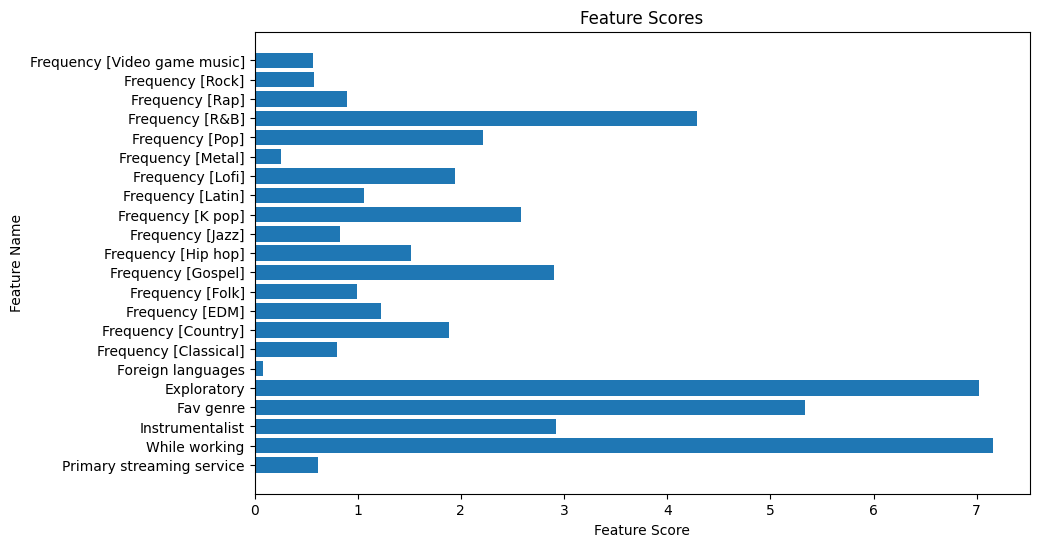

Selected Features: Index(['While working', 'Fav genre', 'Exploratory'], dtype='object')


In [ ]:
#combine models into new model
X = encoded_data.drop('Music effects', axis = 1) #all other features
y = encoded_data['Music effects'] #target variable

#feat selection using SelectKBest w/ ANOVA F-value
selector = SelectKBest(score_func = f_classif, k = 3) #select top 3 features
X_selected = selector.fit_transform(X, y)

#get feat scores
feat_scores = selector.scores_
#get feat names
feat_names = X.columns
#bar plot to visualize feat scores
plt.figure(figsize=(10, 6))
plt.barh(feat_names, feat_scores)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('Feature Scores')
plt.show()

#get indices of selected feats
selected_indices = selector.get_support(indices=True)
#get names of selected feats
selected_feats = X.columns[selected_indices]
print("Selected Features:", selected_feats)

In [ ]:
#split selected feats, target variable into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#initialize decision tree classifier
clf = DecisionTreeClassifier()

#fit classifier to training data
clf.fit(X_train, y_train)

#predict labels of the test set
y_pred = clf.predict(X_test)

#evaluate classifier
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print classification report
print(classification_report(y_test, y_pred, zero_division = 'warn'))

Accuracy: 0.7419354838709677
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        95
           1       0.20      0.04      0.06        27
           2       0.00      0.00      0.00         2

    accuracy                           0.74       124
   macro avg       0.32      0.33      0.30       124
weighted avg       0.63      0.74      0.67       124



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
